In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/Mall_Customers.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


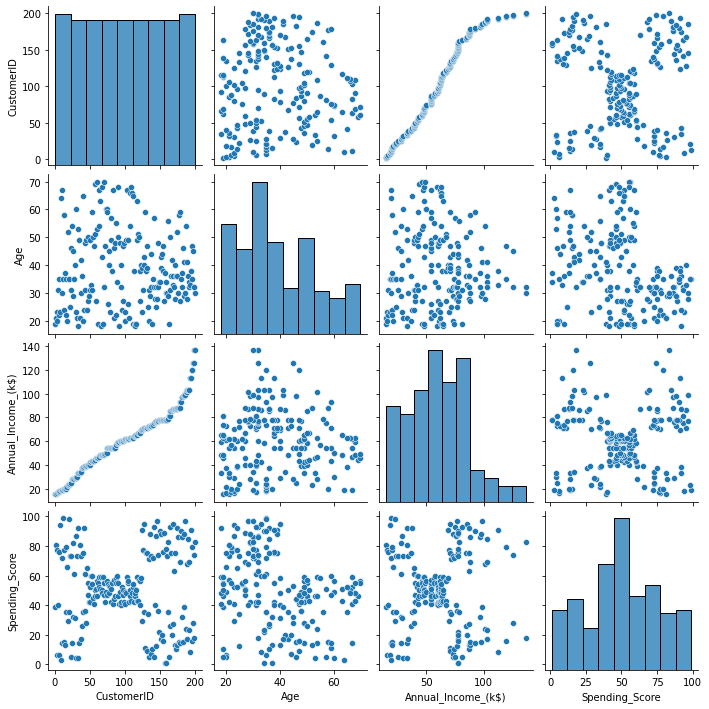

In [6]:
sns.pairplot(df)

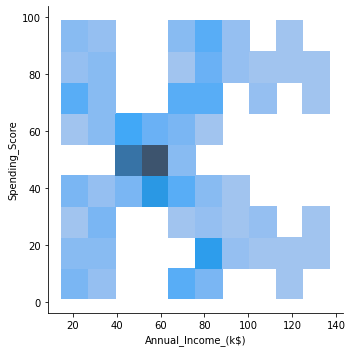

In [9]:
sns.displot(data=df, x='Annual_Income_(k$)', y='Spending_Score')

In [14]:
df.drop('CustomerID', axis=1, inplace=True)

In [15]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
df['Genre'] = df['Genre'].map({'Male':1, 'Female':0})

In [20]:
df['Spending_Score'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending_Score, Length: 84, dtype: int64

In [22]:
df.values

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [10]:
from sklearn.cluster import KMeans

In [27]:
a = []
for i in range(2,15):
    km = KMeans(n_clusters=i)
    km.fit(df.values)
    a.append(km.inertia_)
    print(km.inertia_)

212889.44245524294
143391.59236035674
104414.67534220174
75399.61541401486
58348.64136331505
51165.18423710792
44359.6346411483
40663.6731564088
37256.71946084511
34663.540399230376
31604.058581491434
30675.169953292323
28130.65568145622


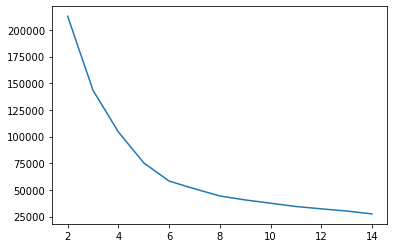

In [25]:
plt.plot(range(2,15), a )

In [29]:
km = KMeans(n_clusters=6)

In [31]:
km.fit(df.values)

KMeans(n_clusters=6)

In [32]:
km.inertia_

58348.64136331505

In [33]:
km.cluster_centers_

array([[ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [34]:
km = KMeans(n_clusters=6)
y_kmeans = km.fit_predict(df)

In [35]:
y_kmeans

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 0, 3,
       5, 4, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [38]:
dff = df.values

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prana\anacond

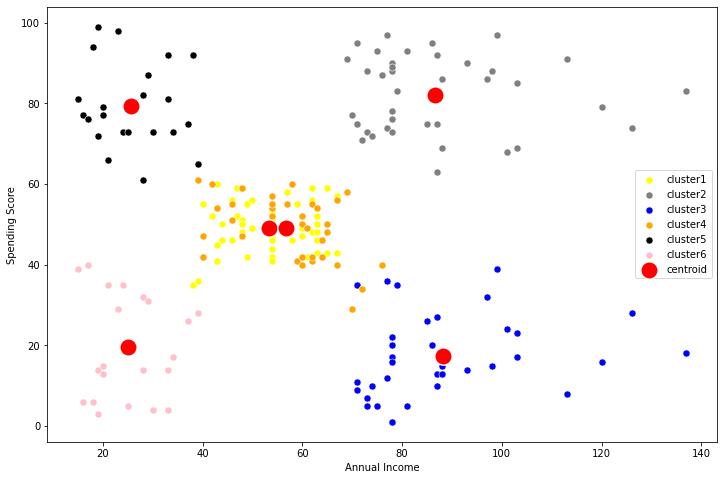

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(dff[y_kmeans==0,2], dff[y_kmeans ==0,3], color='yellow', label='cluster1', s=50)
sns.scatterplot(dff[y_kmeans==1,2], dff[y_kmeans ==1,3], color='grey', label='cluster2', s=50)
sns.scatterplot(dff[y_kmeans==2,2], dff[y_kmeans ==2,3], color='blue', label='cluster3', s=50)
sns.scatterplot(dff[y_kmeans==3,2], dff[y_kmeans ==3,3], color='orange', label='cluster4', s=50)
sns.scatterplot(dff[y_kmeans==4,2], dff[y_kmeans ==4,3], color='black', label='cluster5', s=50)
sns.scatterplot(dff[y_kmeans==5,2], dff[y_kmeans ==5,3], color='pink', label='cluster6', s=50)
sns.scatterplot(km.cluster_centers_[:,2],km.cluster_centers_[:,3], color='red',s=300, label = 'centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()